In [1]:
import argparse
import itertools
import os.path
import time

import torch
import torch.optim.lr_scheduler
import torch.nn as nn
import numpy as np
from pathlib import Path

import evaluate
import trees
import vocabulary
import nkutil
import parse_nk
import csv
import matplotlib.pyplot as plt


Not using CUDA!


In [54]:
str(Path(os.getcwd()).parent.parent.parent) + '\Dyer\self-attentive-parser\plots'

'C:\\Users\\karkau\\Documents\\karthikeya\\oscillating_rnn\\Dyer\\self-attentive-parser\\plots'

In [2]:
import pandas as pd
def gen_wordlist(len_wordlist=60):
    """Generates wordlist as opposed to sentences in the Ding data.

    output structure:    "w1 w2 w3 w4."
    """
    full_ding = pd.read_csv(str(Path(os.getcwd()).parent) + '\\Data\Ding_grammatical.csv',
                           header=None)
    # get all nouns
    nouns = pd.unique(pd.concat([full_ding[1],full_ding[3]]))
    adjectives = pd.unique(full_ding[0])
    verbs = pd.unique(full_ding[2])
    all_words = np.unique(np.concatenate([nouns,adjectives,verbs]))
    word_salad_seqs = []
    for i in range(60):
        word_salad = np.random.choice(all_words,size=4,replace=False)
        word_salad_seq = ' '.join(word_salad) #+ '.'
        word_salad_seqs.append(word_salad_seq)
    jabberwocky_seqs = []
    for i in range(60):
        jabberwocky = np.random.choice(adjectives,size=1) + ' ' + np.random.choice(nouns,size=1) + ' ' + \
            np.random.choice(verbs,size=1) + ' ' + np.random.choice(nouns,size=1)# + '.'
        jabberwocky_seqs.append(list(jabberwocky))
    jabberwocky_seqs = [i[0] for i in jabberwocky_seqs]
    np_seqs = []
    for i in range(60):
        np_seq = np.random.choice(adjectives,size=1) + ' ' + np.random.choice(nouns,size=1) + ' ' + \
            np.random.choice(adjectives,size=1) + ' ' + np.random.choice(nouns,size=1)# + '.'
        np_seqs.append(list(np_seq))
    np_seqs = [i[0] for i in np_seqs]
    vp_seqs = []
    for i in range(60):
        vp_seq = np.random.choice(verbs,size=1) + ' ' + np.random.choice(nouns,size=1) + ' ' + \
            np.random.choice(verbs,size=1) + ' ' + np.random.choice(nouns,size=1) #+ '.'
        vp_seqs.append(list(vp_seq))
    vp_seqs = [i[0] for i in vp_seqs]
    # keep random pattern - say - verb, noun, noun, adjective
    random_patterns = []
    for i in range(60):
        random_pattern = np.random.choice(verbs,size=1) + ' ' + np.random.choice(nouns,size=1) + ' ' + \
            np.random.choice(nouns,size=1) + ' ' + np.random.choice(adjectives,size=1) #+ '.'
        random_patterns.append(list(random_pattern))
    random_patterns = [i[0] for i in random_patterns]

    return [word_salad_seqs,jabberwocky_seqs,np_seqs,vp_seqs,random_patterns]

In [3]:
str(Path(os.getcwd()).parent) + "\\Data\\en_charlstm_dev.93.61.pt"

'C:\\Users\\karkau\\Documents\\karthikeya\\rnn-oscillations\\berkeley_neural_parser\\Data\\en_charlstm_dev.93.61.pt'

In [4]:
# read sentences : 
sentences = []
with open(str(Path(os.getcwd()).parent) + '\\Data\\Ding_grammatical.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        sentences.append(' '.join(row))
        #sentences[-1] = sentences[-1] + '.'
        #print(sentences[-1])
temp = torch.load(str(Path(os.getcwd()).parent) + "\\Data\\en_charlstm_dev.93.61.pt")
parser = parse_nk.NKChartParser.from_spec(temp['spec'], temp['state_dict'])

sentences = ' '.join(sentences)
sentences = sentences.split()

sjnv = gen_wordlist()
sjnv = [subitem for sublist in sjnv for subitem in sublist]
sjnv = ' '.join(sjnv)
sjnv = sjnv.split()
# sentences_all = sentences + sjnv
# sentences_all = sentences, sjnv[0:240] (word salad), sjnv[240:480] (jabberwocky), sjnv[480:720] (np), sjnv[720:] (vp)
sentences_all = sentences + sjnv

if 'UNK' in parser.tag_vocab.indices:
    dummy_tag = 'UNK'
else:
    dummy_tag = parser.tag_vocab.value(0)


In [5]:
def process_sequences(seq_batch):
    outputs_0= []
    def hook_0(module, input, output):
        outputs_0.append(output)
    outputs_1 = []
    def hook_1(module, input, output):
        outputs_1.append(output)
    outputs_2 = []
    def hook_2(module, input, output):
        outputs_2.append(output)
    outputs_3 = []
    def hook_3(module, input, output):
        outputs_3.append(output)
    outputs_4 = []
    def hook_4(module, input, output):
        outputs_4.append(output)
    outputs_5 = []
    def hook_5(module, input, output):
        outputs_5.append(output)
    outputs_6 = []
    def hook_6(module, input, output):
        outputs_6.append(output)
    outputs_7 = []
    def hook_7(module, input, output):
        outputs_7.append(output)



    #original model = parser
    #parser.char_encoder.lstm.register_forward_hook(hook)
    #parser.f_label[3].register_forward_hook(hook)
    #parser.encoder.ff_0.layer_norm.register_forward_hook(hook_0)
    parser.encoder.ff_1.layer_norm.register_forward_hook(hook_0)
    parser.encoder.ff_1.layer_norm.register_forward_hook(hook_1)
    parser.encoder.ff_2.layer_norm.register_forward_hook(hook_2)
    parser.encoder.ff_3.layer_norm.register_forward_hook(hook_3)
    parser.encoder.ff_4.layer_norm.register_forward_hook(hook_4)
    parser.encoder.ff_5.layer_norm.register_forward_hook(hook_5)
    parser.encoder.ff_6.layer_norm.register_forward_hook(hook_6)
    parser.encoder.ff_7.layer_norm.register_forward_hook(hook_7)
    out, _ = parser.parse_batch(seq_batch)
    del _

    temp_acts = outputs_0[0].numpy() + outputs_1[0].numpy() + outputs_2[0].numpy() + outputs_3[0].numpy() + \
        outputs_4[0].numpy() + outputs_5[0].numpy() + outputs_6[0].numpy() + outputs_7[0].numpy()
    # drop first and last one
    temp_acts = temp_acts[1:-1,:]
    return temp_acts


In [6]:
# power spectra function
def power_spectra(w2vec_array, sampling_rate=16):
    """Computes power spectra using the Discrete Fourier Transform.

    Args:
        w2vec_array: arrays of shape (n_sentences*time_steps, n_units)
            representing hidden layer activations in response to each word of the
            concatenated sequence of sentences.
        sample_rate: number of measures (outputs of the model) per second.

    Returns:
        Mean power spectra and frequency axis.
    """

    # Separate each unit and concatenate across words to form 1 vector per unit
    unit_vectors = np.transpose(w2vec_array)

    # Frequency domain
    # num_samples is just the number of data points for each unit
    num_samples = unit_vectors.shape[1]
    freq = np.fft.rfftfreq(num_samples, d=1./sampling_rate)
    print ('freq ' ,freq.shape)
    # Calculate the FFT and power spectra for each unit
    units_ps = []
    for vector in unit_vectors:
        ft_unit = np.fft.rfft(vector)  # fft
        ps_uni = np.abs(ft_unit) ** 2  # power spectrum
        units_ps.append(ps_uni)

    # Average power spectra over units
    mean_ps = np.mean(units_ps, axis=0)
    print ('mean_ps',mean_ps.shape)
    return freq, mean_ps

In [7]:
def plot_results(file_path, freq, power, act,sampling_rate=16,n_samples=60,title='Input stimuli'):
    """Plot all the results of one condition"""

    # Time domain parameters
    sampling_interval = 1.0/sampling_rate  # sampling interval
    t = np.arange(0, n_samples, sampling_interval)  # time vector
    # Build plot
    fig, ax = plt.subplots(nrows=2, ncols=1)
    fig.suptitle(title)
    ax[0].plot(t, act, linewidth=1.0)
    # Axis labels
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    #until_4 = np.where(freq==4)[0][0]
    #print('Power difference ')
    ax[1].plot(freq[1:], power[1:], 'r', linewidth=1.0)
    ax[1].set_xlabel('Freq (Hz)')
    #ax[1].set_ylim([-1000, 9000])
    ax[1].set_ylabel('Power (db)')
    # Adjusts subplot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # Save
    fig.savefig(file_path+'.pdf')


In [8]:
def windowed_zscores(vals,window=10):
    scores = np.zeros(vals.shape)
    seq_length = vals.shape[0]
    for i in range(seq_length):
        # before window length is reached
        if i < window:
            scores[i] = vals[i] - np.concatenate([vals[i+1:i+1+window],vals[0:i]]).mean()
        # less than window length remaining
        elif (i + window) > seq_length:
            scores[i] = vals[i] - np.concatenate([vals[i-window:i],vals[i+1:]]).mean()
        # after window length is reached
        else:
            scores[i] = vals[i] - np.concatenate([vals[i+1:i+1+window],vals[i-window:i]]).mean()
    return scores

In [11]:
def compute_and_plot(activations,plot_title,file_path,condition):
    freq, mean_power = power_spectra(activations,sampling_rate=4)
    mean_power = windowed_zscores(mean_power,window=10)
    # write frequency and mean power and activations to another folder
    data_storage_path = str(Path(os.getcwd()).parent) + '\\Data\\data-vals\\' + condition + str('\\')
    np.save(data_storage_path + 'freq.npy',freq)
    np.save(data_storage_path + 'mean_power.npy',mean_power)
    np.save(data_storage_path + 'activations.npy',np.mean(activations,axis=1))
    plot_results(file_path, 
                 freq, mean_power, act=np.mean(activations,axis=1),
                 sampling_rate=4,n_samples=60,title=plot_title)


..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten

(240, 1024)
freq  (121,)
mean_ps (121,)


..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten

(240, 1024)
freq  (121,)
mean_ps (121,)


..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten

(240, 1024)
freq  (121,)
mean_ps (121,)


..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten

(240, 1024)
freq  (121,)
mean_ps (121,)


..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten

(240, 1024)
freq  (121,)
mean_ps (121,)


..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
..\aten\src\ATen\native\TensorAdvancedIndexing.cpp:573: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten

(240, 1024)
freq  (121,)
mean_ps (121,)


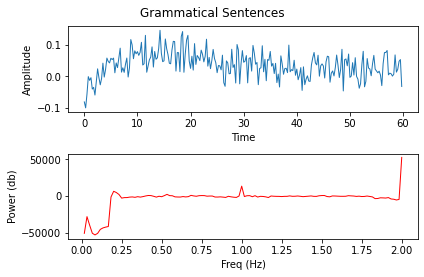

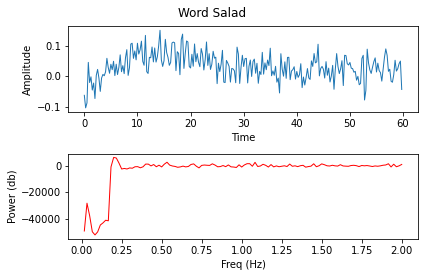

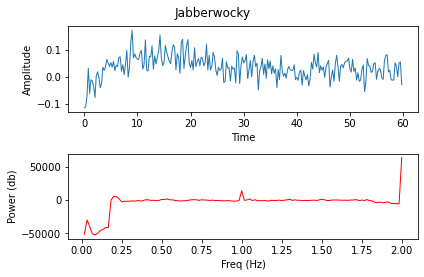

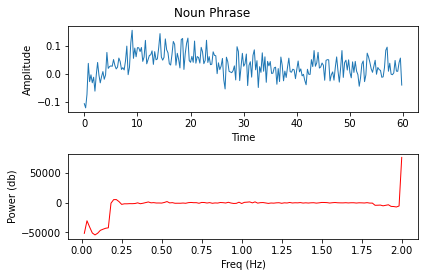

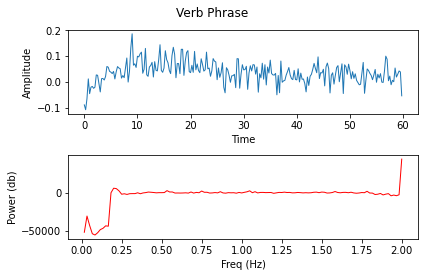

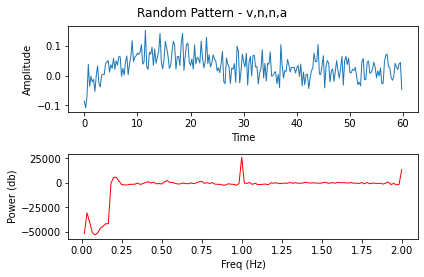

In [13]:
info_dict = {0:[str(Path(os.getcwd()).parent) + '\\Data\\plots-parser-smoothed\\regular_sentences',
                'Grammatical Sentences'],
             1:[str(Path(os.getcwd()).parent) + '\\Data\\plots-parser-smoothed\\word_salad',
                'Word Salad'],
             2:[str(Path(os.getcwd()).parent) + '\\Data\\plots-parser-smoothed\\jabberwocky',
                'Jabberwocky'],
             3:[str(Path(os.getcwd()).parent) + '\\Data\\plots-parser-smoothed\\noun_phrase',
                'Noun Phrase'],
             4:[str(Path(os.getcwd()).parent) + '\\Data\\plots-parser-smoothed\\verb_phrase',
                'Verb Phrase'],
             5:[str(Path(os.getcwd()).parent) + '\\Data\\plots-parser-smoothed\\random_pattern',
                'Random Pattern - v,n,n,a']}
data_names = ['valid_sentences','word_salad','jabberwocky','noun_phrases','verb_phrases','random_pattern']

for i in range(6):
    subbatch_sentences = sentences_all[i*240:240*(i+1)]
    subbatch_sentences = [[(dummy_tag, word) for word in sentences_all[i*240:240*(i+1)]]]
    activations = process_sequences(subbatch_sentences)
    print(activations.shape)
    compute_and_plot(activations=activations,plot_title=info_dict[i][1],file_path=info_dict[i][0],
                    condition=data_names[i])